<a href="https://colab.research.google.com/github/FerBarrey/An-lisis-cuantitativo-avanzados/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2
## Cargar la base

Para este segundo ejercicio se usa una base de libros disponible en: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks

In [1]:
import pandas as pd
import numpy as np

from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jealousleopard/goodreadsbooks

Dataset URL: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
License(s): CC0-1.0
  0% 0.00/622k [00:00<?, ?B/s]
100% 622k/622k [00:00<00:00, 74.1MB/s]


In [2]:
# Extraigo todos los archivos que están en el .zip que acabamos de "bajar".

import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [3]:
# Cargamos la base
df = pd.read_csv('/content/books.csv', on_bad_lines='skip')

In [4]:
df.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [5]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


# Preguntas

Pregunta 1: ¿Cuántos libros hay en la base?

Ayuda: la función len devuelve el largo de una lista o filas de una base.

Otra manera sería con el método .shape

Como sea, el resultado debería ser 11123

In [6]:
df.shape

(11123, 12)

In [8]:
len(df)

11123

Pregunta 2: ¿Cuál es el rating promedio?

Ayuda: `df['average_rating'].mean()` devuelve el promedio de la columna en cuestión. También podría chequear que ese resultado conincida con el obtenido al hacer un "describe" de la base.

In [9]:
df['average_rating'].mean()

3.9340753393868564

Pregunta 3: ¿Cuál es la editorial con más libros en la base?

Ayuda: la respuesta es "Vintage". Una manera de saberlo es mediante `df['publisher'].value_counts()` ¿Pero de qué otras maneras se podría llegar al mismo resultado?

In [11]:
df['publisher'].value_counts()

,count
publisher,
Vintage,318
Penguin Books,261
Penguin Classics,184
Mariner Books,150
Ballantine Books,144
...,...
University of Calgary Press,1
Marlowe & Company,1
University Press of America,1


 La moda es el valor o valores que aparecen con mayor frecuencia en un conjunto de datos , con esta funcion llego al mismo resultado

In [13]:
df['publisher'].mode()[0]

'Vintage'

Pregunta 4: ¿Cómo es la distribución de la cantidad de páginas de los libros en la base?

Ayuda: Podría hacerlo con seaborn

`sns.distplot(df['  num_pages'],bins = 40)`

<ipython-input-29-3f479a7a65d9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['  num_pages'],bins = 40)


<Axes: xlabel='  num_pages', ylabel='Density'>

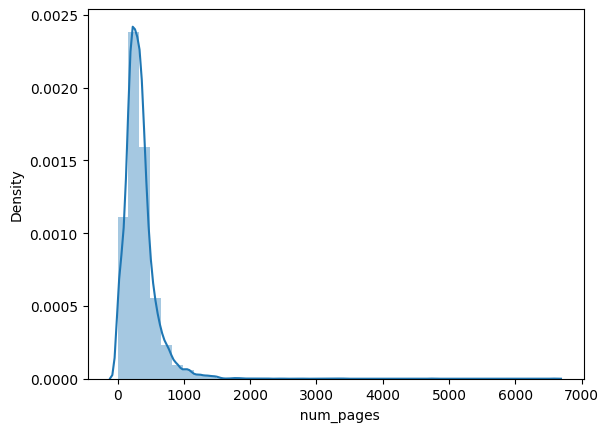

In [29]:
import seaborn as sns
sns.distplot(df['  num_pages'],bins = 40)

Pregunta 5: ¿Existe una relación entre el número de páginas de un libro y su rating promedio? Muestre gráficamente y con una regresión lineal.

Ayuda: El gráfico con seaborn se puede hacer con el siguiente código:
`sns.scatterplot(y='ratings_count',x='  num_pages',data=df)`

La regresión podría hacerse con statsmodels de la siguiente manera:



```
import statsmodels.api as sm
df=df.dropna()
mod = sm.OLS(df['average_rating'], df['  num_pages'])
res = mod.fit()
print(res.summary())
```



También podría hacerse con sklearn. ¿Cómo?



                                 OLS Regression Results                                
Dep. Variable:         average_rating   R-squared (uncentered):                   0.668
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                          2.238e+04
Date:                Mon, 09 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:26:48   Log-Likelihood:                         -24929.
No. Observations:               11123   AIC:                                  4.986e+04
Df Residuals:                   11122   BIC:                                  4.987e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

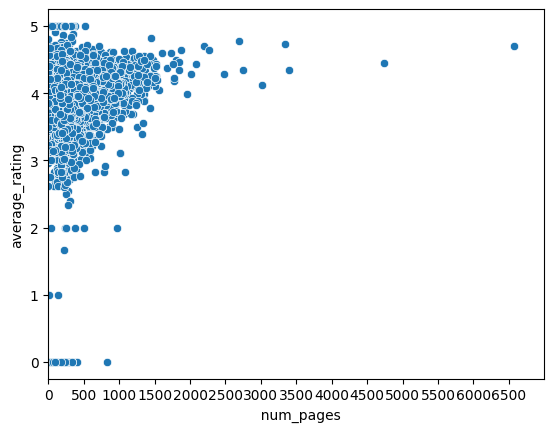

In [44]:
import statsmodels.api as sm
df=df.dropna()
mod = sm.OLS(df['average_rating'], df['  num_pages'])
res = mod.fit()
print(res.summary())
import seaborn as sns
sns.scatterplot(x='  num_pages', y='average_rating', data=df)
import matplotlib.pyplot as plt
plt.xlim(0, 7000)
plt.xticks(np.arange(0, 7000, 500))
plt.show()


El análisis de regresión lineal y el grafico muestra que existe una relacion entre la cantidad de paginas y el promedio de rating de los libros.